# The Quantum Fourier Transform
In this file, we implement QFT for $N = 2^n$ using $\mathcal{O}(n^2) = \mathcal{O}(\log^2 N)$ operations. The implementation is recursive. See phase_estimation.ipynb for an iterative implementation that is more general and can perform the inverse transform as well.

In [165]:
from qiskit import QuantumCircuit, Aer, assemble
sim = Aer.get_backend("aer_simulator")

In [166]:
from math import pi

def R_k(ckt, index, k):
    ckt.cp(pi/(2**k), index, index + k) # p is the general phase gate = [1 0 0 \exp(i\phi)]
    return ckt

In [167]:
# Tail-recursive implementation of the H, Rk gates in a QFT ckt
def QFT_main(ckt, index, n):
    # basecase
    if (index >= n): return ckt
    
    ckt.h(index)
    for i in range(1, n-index):
        R_k(ckt, index, i)
    ckt.barrier()
    
    return QFT_main(ckt, index + 1, n)

In [168]:
# swaps qubits i and j
def swap(ckt, i, j):
    #ckt.cx(i, j); ckt.cx(j, i); ckt.cx(i, j)
    ckt.swap(i, j) # built in. Though the above will also work.
    return ckt

In [169]:
# takes psi 1 \otimes psi 2 ... psi n to \psi n \otimes ... \psi 1
def reverse(ckt):
    for i in range(ckt.width()//2):
        swap(ckt, i, n-1-i)

In [170]:
# Wrapper for above function.
def QFourierTransform(ckt, n):
    qft = ckt.copy()
    QFT_main(qft, 0, n)
    reverse(qft)
    qft.barrier()
    return qft

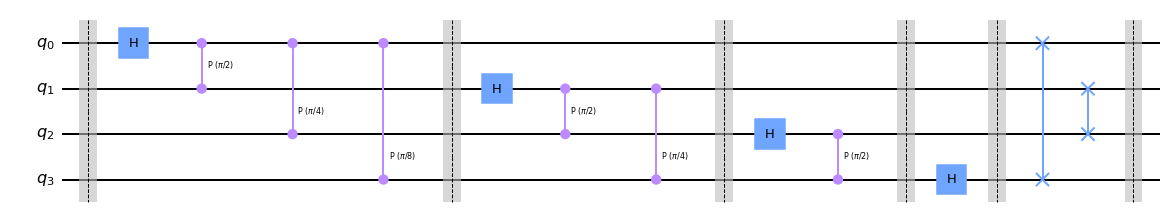

In [171]:
n = 4
ckt = QuantumCircuit(n)
ckt.barrier()
qft = QFourierTransform(ckt, n)
#print(qft)
qft.draw(output="mpl")